In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor
#conda install lightgbm
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from keras.layers import Dense
#from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (3047391517.py, line 3)

NameError: name 'python' is not defined

# Loading Data and Initial Analysis

In [2]:
data = pd.read_csv('Datasets/House_prices_advanced_regression_techniques/train.csv')
test = pd.read_csv('Datasets/House_prices_advanced_regression_techniques/test.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
data.shape

(1460, 81)

In [7]:
data['Id'].nunique()

1460

As all IDs are unique and are of no much use for us, we can drop it

In [8]:
data_mul = data.copy()

In [9]:
predictions = pd.DataFrame()
predictions['Id'] = test['Id']

In [10]:
data = data.drop('Id', axis=1)

In [11]:
data.shape

(1460, 80)

In [12]:
test = test.drop('Id', axis=1)

In [13]:
test.shape

(1459, 79)

In [14]:
data[data['YearBuilt']<1900]['YearBuilt']

106     1885
185     1892
304     1880
583     1893
630     1880
716     1890
747     1880
809     1898
945     1890
991     1882
1132    1880
1137    1875
1292    1892
1349    1872
1416    1885
Name: YearBuilt, dtype: int64

In [15]:
data[(data['YearBuilt']== 1985) | (data['YearBuilt']== 1885)][['YearBuilt','SalePrice','YrSold']]

,YearBuilt,SalePrice,YrSold
101,1985,178000,2010
106,1885,100000,2007
470,1985,212000,2010
720,1985,275000,2006
1146,1985,180000,2006
1407,1985,112000,2009
1416,1885,122500,2010


In [16]:
data[(data['YearBuilt']== 1872) | (data['YearBuilt']== 1972)][['YearBuilt','SalePrice','YrSold']]

,YearBuilt,SalePrice,YrSold
59,1972,124900,2008
191,1972,184000,2007
194,1972,127000,2008
232,1972,94500,2006
303,1972,149900,2006
363,1972,118000,2009
396,1972,123000,2009
434,1972,81000,2008
516,1972,158000,2009
537,1972,111250,2008


In [17]:
test['YearBuilt'].describe()

count    1459.000000
mean     1971.357779
std        30.390071
min      1879.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

There were few records of houses being built in 1800s. In test too there are records of houses built in 1800s. So we cannot diregard them as incorrect. We'll carry on without any change




In [18]:
data[data['LotArea'] > 100000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [19]:
data[data['SalePrice'] >= 300000][['LotArea','SalePrice']]

,LotArea,SalePrice
6,10084,307000
11,11924,345000
20,14215,325300
27,11478,306000
35,13418,309000
...,...,...
1373,11400,466500
1388,14892,377500
1417,16545,340000
1437,12444,394617


There are few records with high LotArea and high SalePrices. There can be many reasons for them.

In [20]:
data[['1stFlrSF','2ndFlrSF','GrLivArea']]

,1stFlrSF,2ndFlrSF,GrLivArea
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198
...,...,...,...
1455,953,694,1647
1456,2073,0,2073
1457,1188,1152,2340
1458,1078,0,1078


In [21]:
data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145
...,...,...,...,...
1455,0,0,953,953
1456,790,163,589,1542
1457,275,0,877,1152
1458,49,1029,0,1078


As we can see above GrLivArea equals 1stFlrSF + 2ndFlrSF

Similar is the case with TotalBsmtSF

We can drop the rest columns as they can be represented by one consolidated column and including all might create multicollinearity

Multicollinearity is a statistical concept where several independent variables in a model are correlated

In [22]:
data = data.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis= 1)

In [23]:
test = test.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis= 1)

## *Null Values*

In [24]:
def missing_values(df):
  '''
  To print the count and percentage of missing values. Values with zero counts have been removed
  '''
  sum = df.isna().sum().sort_values(ascending= False)[df.isna().sum().sort_values(ascending= False) != 0]
  percent = (sum/len(df))*100
  return pd.concat([sum,percent],axis=1, keys=['Sum','Percent'])

In [25]:
missing_values(data)

,Sum,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageFinish,81,5.547945
GarageType,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945


In [26]:
print('Test Data missing values')
missing_values(test)

Test Data missing values


,Sum,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
GarageQual,78,5.346127
GarageCond,78,5.346127


In [27]:
test['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [28]:
test['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

There are some records where the category is None given as NA, those are not the null records.

      
      

In [29]:
na_value_cols = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                 'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [30]:
def none_values(df):
  '''
  To impute None values wherever there is categorical with NA values
  '''
  na_value_col = ['Alley','Fence','MiscFeature']
  garage_col = ['GarageType','GarageFinish','GarageQual','GarageCond']
  bsmt_col = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
  
  for col in na_value_col:
    df[col] = df[col].fillna('None')
  
  for i in range (0,len(df)):
    
    if (df.loc[i,'GarageArea']==0):
      for col in garage_col:
        df.loc[i,col] = 'None'
    
    if (df.loc[i,'Fireplaces']==0):
      df.loc[i,'FireplaceQu'] = 'None'
    
    if (df.loc[i,'TotalBsmtSF']==0):
      for col in bsmt_col:
        df.loc[i,col] = 'None'
    
    if (df.loc[i,'MasVnrArea']==0):
      df.loc[i,'MasVnrType'] = 'None'
    
    if (df.loc[i,'PoolArea']==0):
      df.loc[i,'PoolQC'] = 'None'

In [31]:
none_values(data)
none_values(test)

In [32]:
missing_values(data)

,Sum,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtExposure,1,0.068493
Electrical,1,0.068493
BsmtFinType2,1,0.068493


In [33]:
missing_values(test)

,Sum,Percent
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
MasVnrType,16,1.096642
MasVnrArea,15,1.028101
BsmtCond,4,0.274160
MSZoning,4,0.274160
PoolQC,3,0.205620
BsmtExposure,3,0.205620
BsmtQual,3,0.205620
Functional,2,0.137080


In [34]:
cat_col = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
           'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
           'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
           'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold',
           'SaleCondition','SaleType']

In [35]:
num_col = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','LowQualFinSF',
           'GrLivArea','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',
           'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']

In [36]:
map_col = ['LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual',
           'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','BsmtFullBath',
           'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
           'Functional','Fireplaces','FireplaceQu','GarageFinish','GarageQual','GarageCond',
           'PoolQC']

In [37]:
ohe_col = list(set(cat_col) - set(map_col))

In [38]:
ohe_col

['BldgType',
 'MSSubClass',
 'MasVnrType',
 'Exterior2nd',
 'MiscFeature',
 'PavedDrive',
 'Heating',
 'Electrical',
 'Foundation',
 'SaleCondition',
 'MSZoning',
 'SaleType',
 'HouseStyle',
 'CentralAir',
 'Condition2',
 'RoofMatl',
 'Alley',
 'LotConfig',
 'Condition1',
 'Neighborhood',
 'Fence',
 'GarageType',
 'Exterior1st',
 'Street',
 'MoSold',
 'LandContour',
 'RoofStyle']

We can see for houses without basement or garage some of the numerical values are being displayed as NA values. These should be zero as garage or basement is not available

In [39]:
data[(data['GarageArea']==0) | (data['TotalBsmtSF']==0)]['GarageYrBlt']

17      1967.0
39         NaN
48         NaN
78         NaN
88         NaN
         ...  
1407       NaN
1412    1956.0
1449       NaN
1450       NaN
1453       NaN
Name: GarageYrBlt, Length: 111, dtype: float64

In [40]:
#to impute 0 instead of null values as it should be NONE.
def zero_values(df):
    bsmt_col = ['BsmtFullBath','BsmtHalfBath']
    garage_col = ['GarageYrBlt','GarageCars']
    
    for i in range(0,len(df)):
        if(df.loc[i,'GarageArea']==0):
            for col in garage_col:
                df.loc[i,col] = 0
        
        if (df.loc[i,'TotalBsmtSF']==0):
            for col in bsmt_col:
                df.loc[i,col] = 0
        
        if (df[df.index == i][['MasVnrType','MasVnrArea']].isnull()['MasVnrType'][i] == True) & (df[df.index == i][['MasVnrType','MasVnrArea']].isnull()['MasVnrArea'][i] == True):
            df.loc[i,'MasVnrType'] = 'None'
            df.loc[i,'MasVnrArea'] = 0
            

In [41]:
zero_values(data)

In [42]:
zero_values(test)

In [43]:
missing_values(data)

,Sum,Percent
LotFrontage,259,17.739726
Electrical,1,0.068493
BsmtFinType2,1,0.068493
BsmtExposure,1,0.068493


In [44]:
missing_values(test)

,Sum,Percent
LotFrontage,227,15.558602
BsmtCond,4,0.274160
MSZoning,4,0.274160
BsmtQual,3,0.205620
BsmtExposure,3,0.205620
PoolQC,3,0.205620
GarageYrBlt,2,0.137080
GarageFinish,2,0.137080
Utilities,2,0.137080
Functional,2,0.137080


# Visualisations

In [45]:
data1 = data[data.notna()].copy()

In [46]:
cor_mat = data1.corr()

<AxesSubplot:>

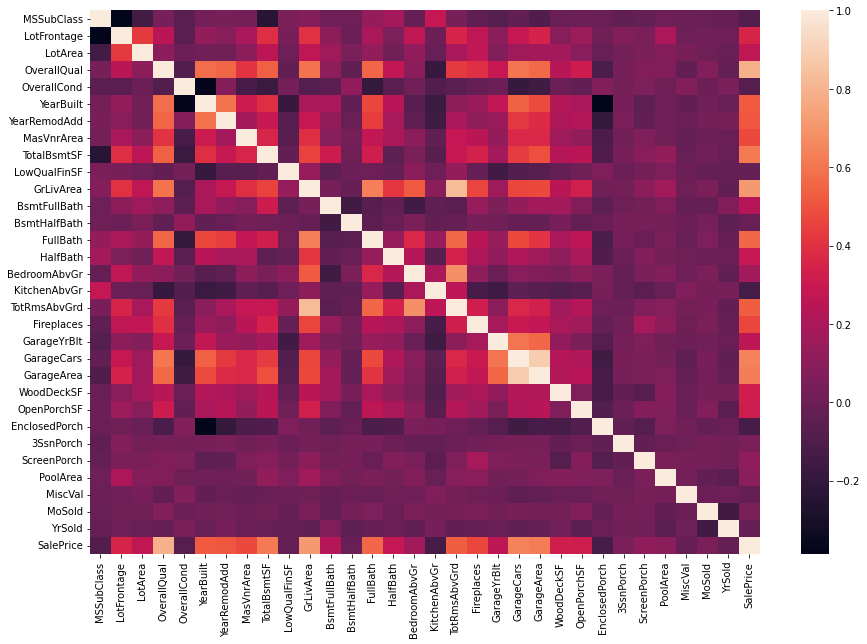

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(cor_mat)




Lets look into the relationships which have shown higher correlation with Sale Price




Text(0, 0.5, 'Sale Price')

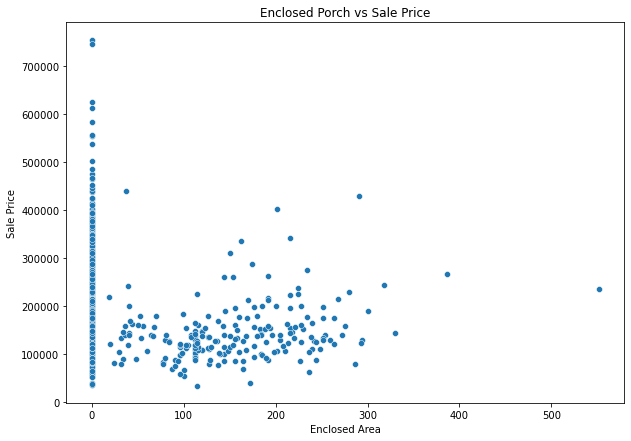

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=data1)
plt.title('Enclosed Porch vs Sale Price')
plt.xlabel('Enclosed Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

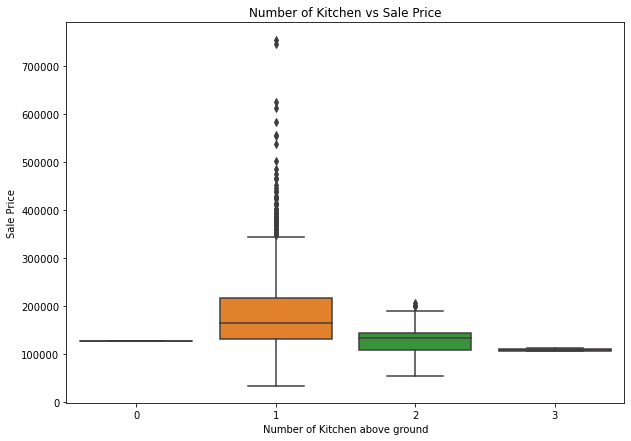

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(x='KitchenAbvGr',y='SalePrice', data=data1)
plt.title('Number of Kitchen vs Sale Price')
plt.xlabel('Number of Kitchen above ground')
plt.ylabel('Sale Price')





In the Enclosed Porch plot we can see that there are many 0 values and for the Kitchen above ground plot the values mostly have value 1 and 2.
As values have been concentrated in these features the correlation values were high for them

Text(0.5, 1.0, 'Distribution of Sale Price')

<Figure size 720x504 with 0 Axes>

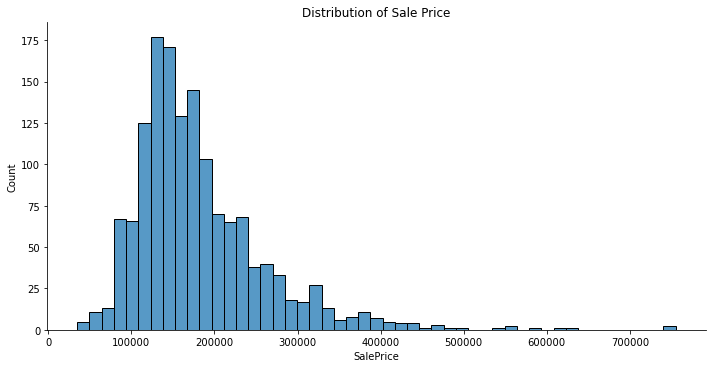

In [50]:
plt.figure(figsize=(10,7))
sns.displot(x='SalePrice', data=data1, aspect=2)
plt.title("Distribution of Sale Price")

Text(0, 0.5, 'Sale Price')

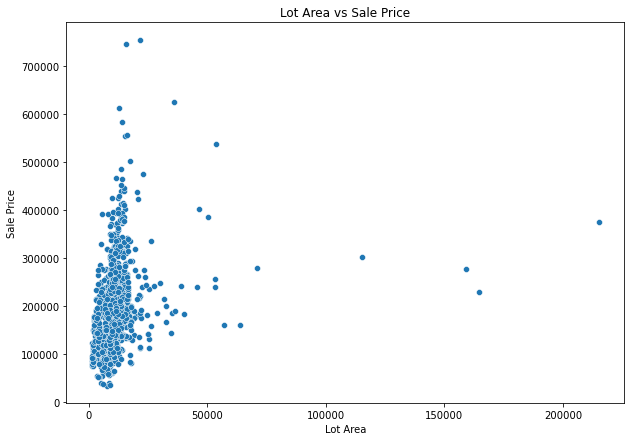

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='LotArea', y='SalePrice', data=data1)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

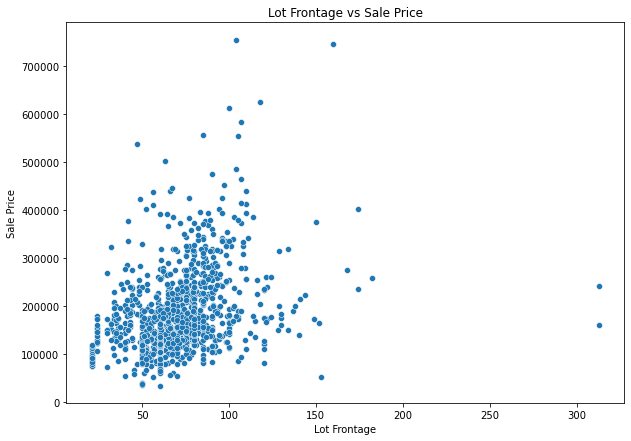

In [52]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=data1)
plt.title('Lot Frontage vs Sale Price')
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')

As we can see Lot Frontage has some clear relation with the Sale Price, also its correlation was significant.
But there are quite a large number of missing values for Lot Frontage. 
We cannot just drop the column or impute values with mean or median

Text(0, 0.5, 'Sale Price')

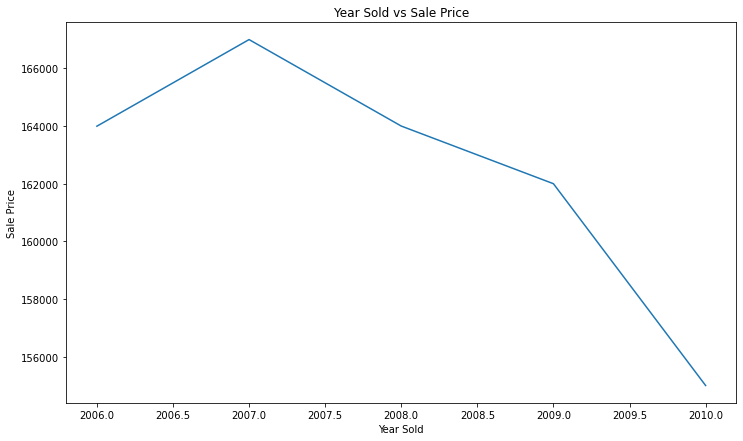

In [53]:
plt.figure(figsize=(12,7))
data1.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Year Sold vs Sale Price')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

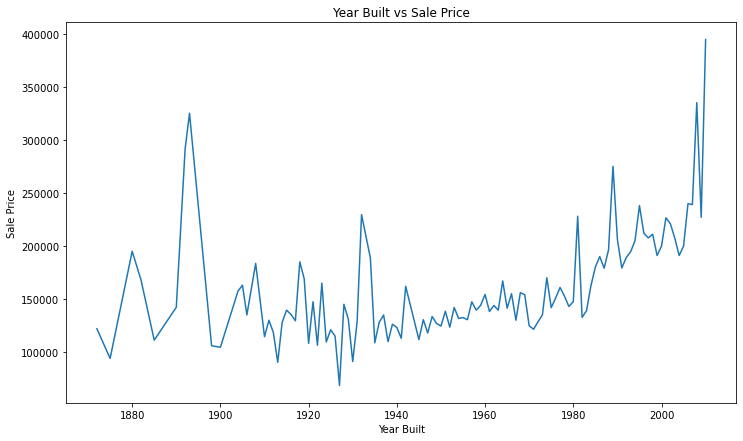

In [54]:
plt.figure(figsize=(12,7))
data1.groupby('YearBuilt')['SalePrice'].median().plot()
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

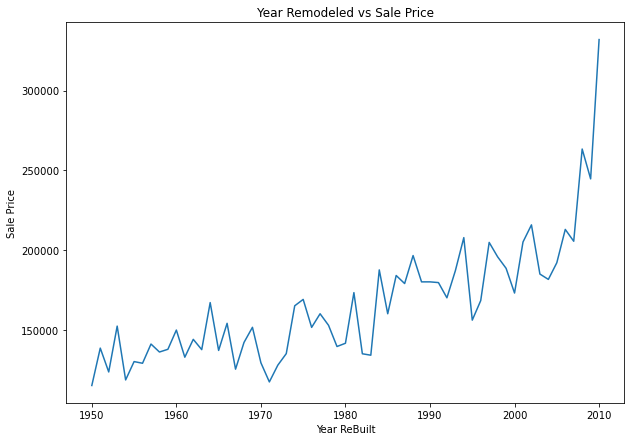

In [55]:
plt.figure(figsize=(10,7))
data1.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.title('Year Remodeled vs Sale Price')
plt.xlabel('Year ReBuilt')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

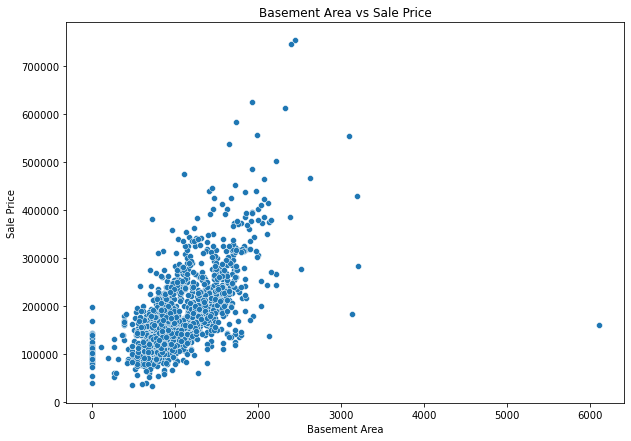

In [56]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data1)
plt.title('Basement Area vs Sale Price')
plt.xlabel('Basement Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

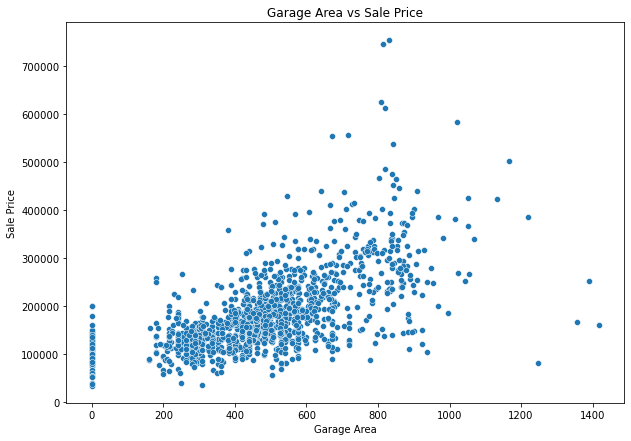

In [57]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='GarageArea', y='SalePrice', data=data1)
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

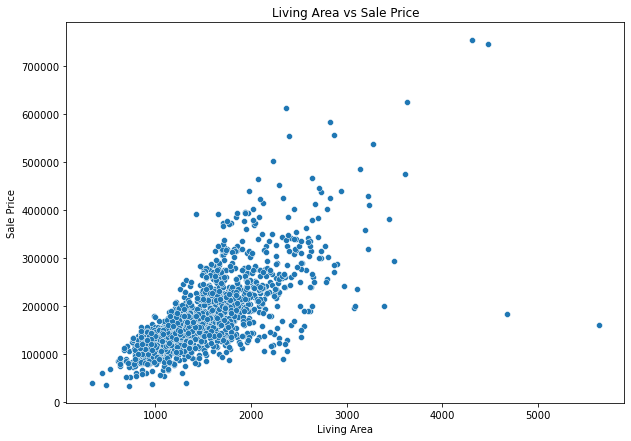

In [58]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data1)
plt.title('Living Area vs Sale Price')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

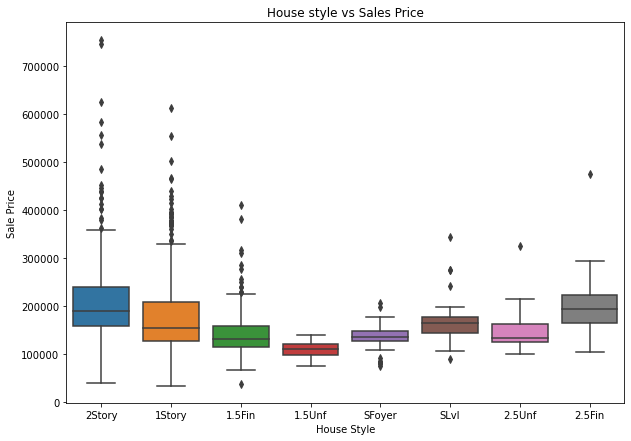

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(x='HouseStyle', y='SalePrice', data=data1)
plt.title('House style vs Sales Price')
plt.xlabel('House Style')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

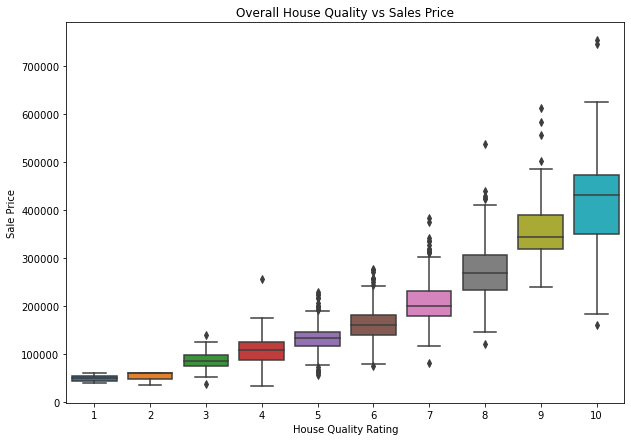

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x='OverallQual', y='SalePrice', data=data1)
plt.title('Overall House Quality vs Sales Price')
plt.xlabel('House Quality Rating')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

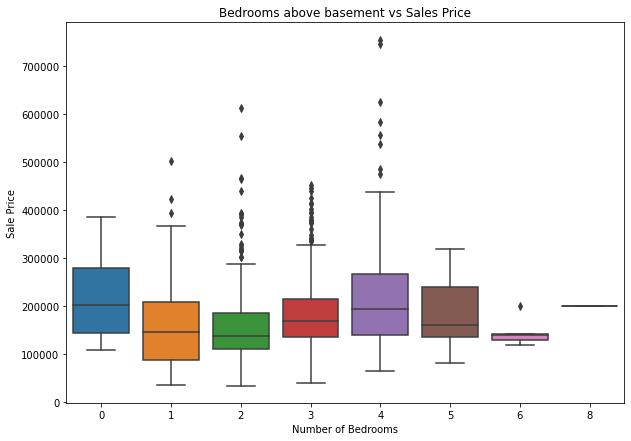

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=data1)
plt.title('Bedrooms above basement vs Sales Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

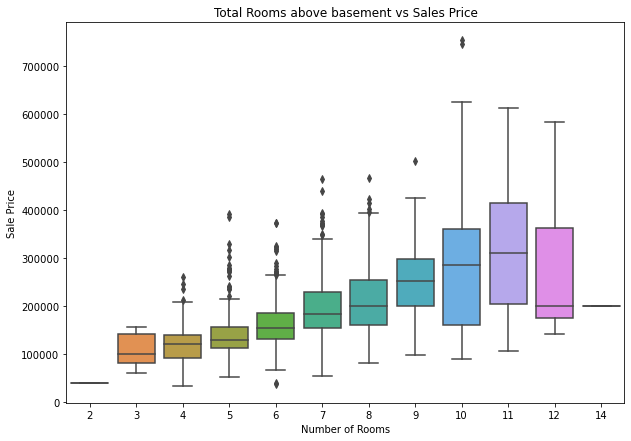

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=data1)
plt.title('Total Rooms above basement vs Sales Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

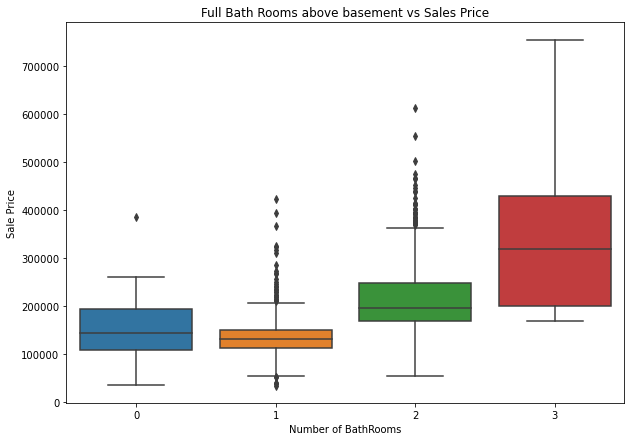

In [63]:
plt.figure(figsize=(10,7))
sns.boxplot(x='FullBath', y='SalePrice', data=data1)
plt.title('Full Bath Rooms above basement vs Sales Price')
plt.xlabel('Number of BathRooms')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

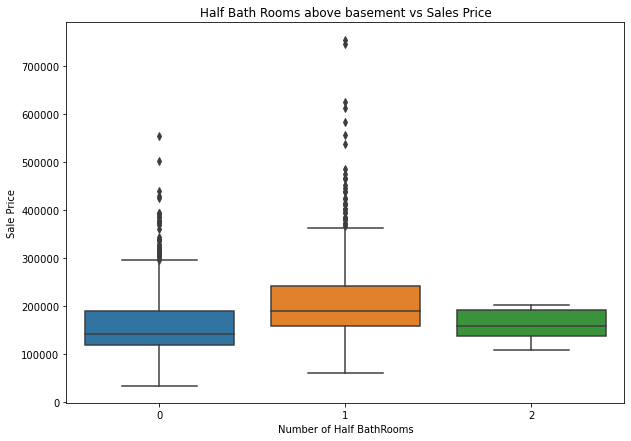

In [64]:
plt.figure(figsize=(10,7))
sns.boxplot(x='HalfBath', y='SalePrice', data=data1)
plt.title('Half Bath Rooms above basement vs Sales Price')
plt.xlabel('Number of Half BathRooms')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

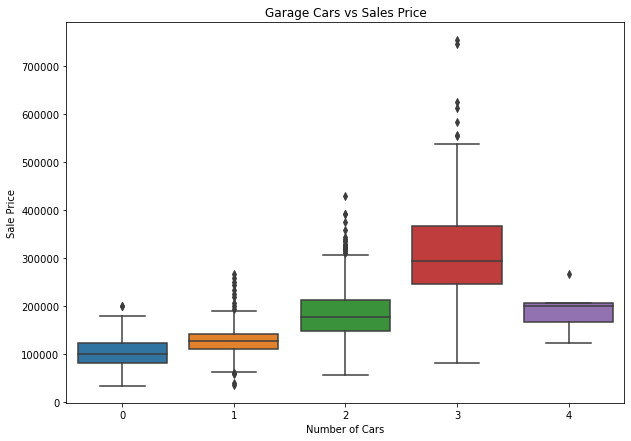

In [65]:
plt.figure(figsize=(10,7))
sns.boxplot(x='GarageCars', y='SalePrice', data=data1)
plt.title('Garage Cars vs Sales Price')
plt.xlabel('Number of Cars')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

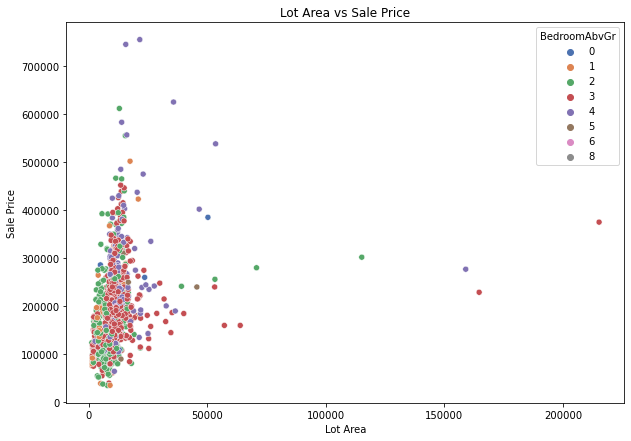

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='LotArea', y='SalePrice',hue= 'BedroomAbvGr',palette='deep', data=data1)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')

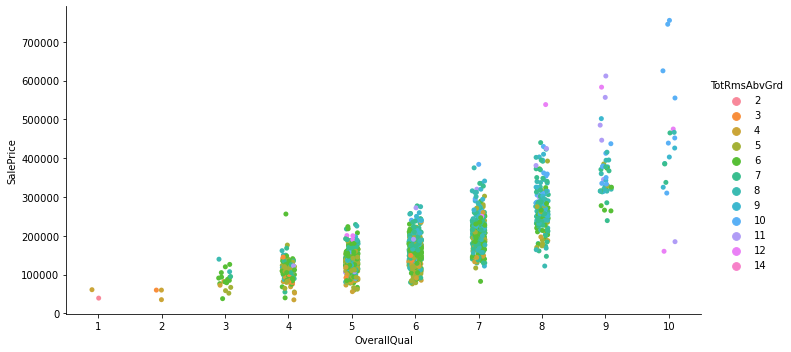

In [67]:

sns.catplot(x='OverallQual', y='SalePrice',hue='TotRmsAbvGrd', data=data1, aspect=2)

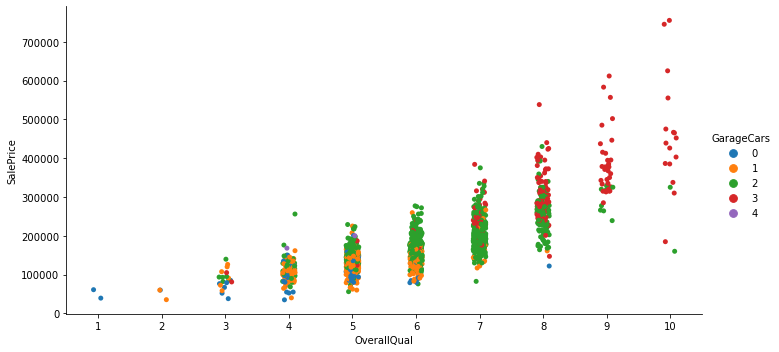

In [68]:
sns.catplot(x='OverallQual', y='SalePrice',hue='GarageCars', data=data1, aspect=2)

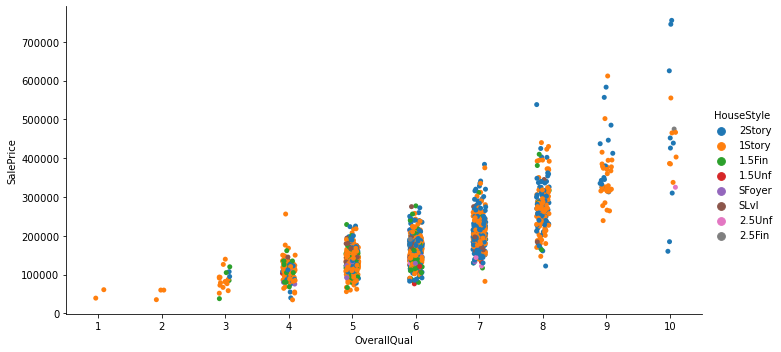

In [69]:
sns.catplot(x='OverallQual', y='SalePrice',hue='HouseStyle', data=data1, aspect=2)

# Train Test Split

In [70]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

We already have the test data file so we make this split as train and validation as we'll be training and tuning our models based on the validation data errors

# Imputations

In [72]:
imputer_cat = SimpleImputer(strategy= 'most_frequent')

In [73]:
imputer_cat.fit(X_train[cat_col])

SimpleImputer(strategy='most_frequent')

In [74]:
X_train[cat_col] = imputer_cat.transform(X_train[cat_col])

In [75]:
X_val[cat_col] = imputer_cat.transform(X_val[cat_col])

In [76]:
test[cat_col] = imputer_cat.transform(test[cat_col])

In [77]:
missing_values(X_train)

,Sum,Percent
LotFrontage,190,18.590998


For LotFrontage more than 18 percent of the data is missing. As this feature is quite correlated to target we cannot simply drop it.

Also we cannot just use SimpleImputer with median. As all missing data will be filled with median values

So here we will try the KNN Imputer.

With KNN Imputer for each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

KNN Imputer only takes the numerical data, so we'll train it on training numerical data

In [78]:
imputer_num = KNNImputer(n_neighbors=2, weights= 'distance')

In [79]:
imputer_num.fit(X_train[num_col])

KNNImputer(n_neighbors=2, weights='distance')

In [80]:
X_train[num_col] = imputer_num.transform(X_train[num_col])

In [81]:
X_val[num_col] = imputer_num.transform(X_val[num_col])

In [82]:
test[num_col] = imputer_num.transform(test[num_col])

In [83]:
missing_values(X_train)

,Sum,Percent


In [84]:
missing_values(X_val)

,Sum,Percent


In [85]:
missing_values(test)

,Sum,Percent


# Dummification

## One Hot Encoding

In [86]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

In [87]:
ohe.fit(X_train[ohe_col])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [88]:
onehot_col = list(ohe.get_feature_names(ohe_col))
print(onehot_col)

['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MiscFeature_None', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'PavedDrive_P', 'PavedDrive_Y', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_SBrkr', 'Foundation_CBlock', 'Foundati

In [89]:
X_train_ohe = ohe.transform(X_train[ohe_col])
X_val_ohe = ohe.transform(X_val[ohe_col])

In [90]:
test_ohe = ohe.transform(test[ohe_col])

In [91]:
X_train_ohe = pd.DataFrame(X_train_ohe.todense(), columns= onehot_col)
X_val_ohe = pd.DataFrame(X_val_ohe.todense(), columns= onehot_col)

In [92]:
test_ohe = pd.DataFrame(test_ohe.todense(), columns= onehot_col)

There are few features which gives the ratings of some kind

For such rating feature we'll use Ordinal Encoder

## Ordinal Encoding

Ordinal data is a kind of categorical data with a set order or scale to it.

The below columns represent some sort of ratings or grades. Thus they have some order among them.

Hence we need to encode them as per their order

In [93]:
for col in map_col:
    print(col, X_train[col].unique())

LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Utilities ['AllPub' 'NoSeWa']
LandSlope ['Gtl' 'Mod' 'Sev']
OverallQual [7 5 9 6 4 8 10 3 1 2]
OverallCond [6 5 7 8 3 4 9 2 1]
ExterQual ['TA' 'Ex' 'Gd' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['TA' 'Gd' 'Ex' 'None' 'Fa']
BsmtCond ['TA' 'Gd' 'Fa' 'None' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1 ['Unf' 'GLQ' 'ALQ' 'Rec' 'BLQ' 'LwQ' 'None']
BsmtFinType2 ['Unf' 'ALQ' 'Rec' 'LwQ' 'None' 'BLQ' 'GLQ']
HeatingQC ['Gd' 'Ex' 'TA' 'Fa' 'Po']
BsmtFullBath [0 1 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [0 1 2]
BedroomAbvGr [3 2 4 5 1 6 0 8]
KitchenAbvGr [1 2 0]
KitchenQual ['TA' 'Gd' 'Ex' 'Fa']
TotRmsAbvGrd [7 5 8 6 12 4 11 10 9 3 2 14]
Functional ['Typ' 'Min2' 'Maj2' 'Mod' 'Min1' 'Maj1' 'Sev']
Fireplaces [1 0 2 3]
FireplaceQu ['Gd' 'None' 'TA' 'Ex' 'Fa' 'Po']
GarageFinish ['Unf' 'Fin' 'RFn' 'None']
GarageQual ['TA' 'Gd' 'None' 'Fa' 'Ex' 'Po']
GarageCond ['TA' 'None' 'Fa' 'Po' 'Gd' 'Ex']
PoolQC ['None' 'Ex' 'Gd' 'Fa']


We'll map the above categories as per ordinal mapping

In [94]:
qual = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
lot = {'Reg':4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
utilities = {'AllPub':4, 'NoSeWa': 3, 'NoSeWa': 2, 'ELO': 1}
landslope = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
bsmtexposure = {'Gd': 4, 'Av': 3,'Mn': 2, 'No': 1,'None': 0}
bsmtfintype = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
functional = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
garagefinish = {'Fin': 3,'RFn': 2,'Unf': 1, 'None': 0}

In [95]:
def Ordinal(df):
    qual_col = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
               'GarageQual','GarageCond','PoolQC']
    for col in qual_col:
        df[col] = df[col].map(qual)
    
    df['LotShape'] = df['LotShape'].map(lot)
    df['Utilities'] = df['Utilities'].map(utilities)
    df['LandSlope'] = df['LandSlope'].map(landslope)
    df['BsmtExposure'] = df['BsmtExposure'].map(bsmtexposure)
    df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtfintype)
    df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtfintype)
    df['Functional'] = df['Functional'].map(functional)
    df['GarageFinish'] = df['GarageFinish'].map(garagefinish)
    
    return df

In [96]:
X_train_map = Ordinal(X_train[map_col])
X_val_map = Ordinal(X_val[map_col])

In [97]:
test_map = Ordinal(test[map_col])

In [98]:
X_train_map = X_train_map.reset_index(drop=True)
X_val_map = X_val_map.reset_index(drop=True)

In [99]:
test_map = test_map.reset_index(drop=True)

In [100]:
for col in X_train_map.columns:
    print(col, X_train_map[col].unique())

LotShape [4 3 2 1]
Utilities [4 2]
LandSlope [3 2 1]
OverallQual [7 5 9 6 4 8 10 3 1 2]
OverallCond [6 5 7 8 3 4 9 2 1]
ExterQual [3 5 4 2]
ExterCond [3 4 2 1 5]
BsmtQual [3 4 5 0 2]
BsmtCond [3 4 2 0 1]
BsmtExposure [1 4 2 3 0]
BsmtFinType1 [1 6 5 3 4 2 0]
BsmtFinType2 [1 5 3 2 0 4 6]
HeatingQC [4 5 3 2 1]
BsmtFullBath [0 1 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [0 1 2]
BedroomAbvGr [3 2 4 5 1 6 0 8]
KitchenAbvGr [1 2 0]
KitchenQual [3 4 5 2]
TotRmsAbvGrd [7 5 8 6 12 4 11 10 9 3 2 14]
Functional [8 6 3 5 7 4 2]
Fireplaces [1 0 2 3]
FireplaceQu [4 0 3 5 2 1]
GarageFinish [1 3 2 0]
GarageQual [3 4 0 2 5 1]
GarageCond [3 0 2 1 4 5]
PoolQC [0 5 4 2]


The corresponding mapping has been done

# Scaling

As we had already seen before that there few reords with high values.

These are the houses with high areas. But these values are differnt that the usual values(outliers).

But they are the actual values of large house so we cannot just drop them treating as outliers. We need to check.

With such large values Scaling might be affected. So we'll use the Robust Scaler

Robust Scaler removes the median and scales the data according to the quantile range 

In [101]:
scaling = RobustScaler()

In [102]:
scaling.fit(X_train[num_col])

RobustScaler()

In [103]:
X_train_num = pd.DataFrame(scaling.transform(X_train[num_col]), columns= num_col)
X_val_num = pd.DataFrame(scaling.transform(X_val[num_col]), columns= num_col)

In [104]:
test_num = pd.DataFrame(scaling.transform(test[num_col]), columns= num_col)

In [105]:
X_train = pd.concat([X_train_map, X_train_num, X_train_ohe], axis= 1)
X_val = pd.concat([X_val_map, X_val_num, X_val_ohe], axis= 1)

In [106]:
test = pd.concat([test_map, test_num, test_ohe], axis= 1)

In [107]:
X_train.head()

,LotShape,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,MoSold_11,MoSold_12,LandContour_HLS,LandContour_Low,LandContour_Lvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,4,4,3,7,6,3,3,3,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4,4,3,5,5,3,3,4,3,4,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,4,4,3,7,5,3,3,4,3,2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3,4,3,9,5,5,3,5,4,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2,4,3,7,6,4,3,4,3,3,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [108]:
X_train.select_dtypes('object').columns

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [109]:
object_col = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr',
              'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces']

In [110]:
for col in object_col:
    print(col, X_train[col].unique())

OverallQual [7 5 9 6 4 8 10 3 1 2]
OverallCond [6 5 7 8 3 4 9 2 1]
BsmtFullBath [0 1 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [0 1 2]
BedroomAbvGr [3 2 4 5 1 6 0 8]
KitchenAbvGr [1 2 0]
TotRmsAbvGrd [7 5 8 6 12 4 11 10 9 3 2 14]
Fireplaces [1 0 2 3]


In [111]:
X_train[map_col] = X_train[map_col].astype('int64')
X_val[map_col] = X_val[map_col].astype('int64')

In [112]:
test[map_col] = test[map_col].astype('int64')

# Model Building

In [113]:
def eval(y_train, y_train_pred, y_val, y_val_pred):
    
    print(f"The Mean Absolute Error on train dataset: {mean_absolute_error(y_pred= y_train_pred, y_true= y_train):.3f} \n")
    print(f"The Mean Absolute Error on validation dataset: {mean_absolute_error(y_pred= y_val_pred, y_true= y_val):.3f} \n\n")

    print(f"The Mean Squared Error on train dataset: {mean_squared_error(y_pred= y_train_pred, y_true= y_train):.3f} \n")
    print(f"The Mean Squared Error on validation dataset: {mean_squared_error(y_pred= y_val_pred, y_true= y_val):.3f} \n\n")

    print(f"The Root Mean Squared Error on train dataset: {np.sqrt(mean_squared_error(y_pred= y_train_pred, y_true= y_train)):.3f} \n")
    print(f"The Root Mean Squared Error on validation dataset: {np.sqrt(mean_squared_error(y_pred= y_val_pred, y_true= y_val)):.3f} \n\n")

    print(f"The Mean Absolute Percentage Error on train dataset: {mean_absolute_percentage_error(y_pred= y_train_pred, y_true= y_train)*100:.3f} \n")
    print(f"The Mean Absolute Percentage Error on validation dataset: {mean_absolute_percentage_error(y_pred= y_val_pred, y_true= y_val)*100:.3f} \n")

In [114]:
scores = pd.DataFrame(columns=['Model', 'Train_MAE', 'Val_MAE', 'Train_MSE','Val_MSE', 'Train_RMSE', 'Val_RMSE',
                               'Train_MAPE', 'Val_MAPE'])

def get_metrics(y_train, y_train_pred, y_val, y_val_pred, model_description, dataframe):

    train_mae = round(mean_absolute_error(y_true= y_train, y_pred= y_train_pred),3)
    train_mse = round(mean_squared_error(y_true= y_train, y_pred= y_train_pred),3)
    train_rmse = round(np.sqrt(mean_squared_error(y_true= y_train, y_pred= y_train_pred)),3)
    train_mape = round(mean_absolute_percentage_error(y_true= y_train, y_pred= y_train_pred)*100,3)
    
    val_mae = round(mean_absolute_error(y_true= y_val, y_pred= y_val_pred),3)
    val_mse = round(mean_squared_error(y_true= y_val, y_pred= y_val_pred),3)
    val_rmse = round(np.sqrt(mean_squared_error(y_true= y_val, y_pred= y_val_pred)),3)
    val_mape = round(mean_absolute_percentage_error(y_true= y_val, y_pred= y_val_pred)*100,3)

    dataframe = dataframe.append(pd.Series([model_description, train_mae, val_mae, train_mse, val_mse,
                                            train_rmse, val_rmse, train_mape, val_mape],index=scores.columns ), 
                                 ignore_index=True)

    return(dataframe)

## Linear Regression 

In [115]:
linear_reg = LinearRegression()

In [116]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [117]:
scoring = 'neg_mean_squared_error'

In [118]:
np.sqrt(-cross_val_score(linear_reg, X_train, y_train, cv=5, scoring= 'neg_mean_squared_error'))

array([3.41825021e+04, 9.20285446e+13, 3.87429683e+04, 2.87187946e+04,
       1.93810569e+05])

In [119]:
9.13939514e+13

91393951400000.0

In [120]:
y_train_pred = linear_reg.predict(X_train)
y_val_pred = linear_reg.predict(X_val)

In [121]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 14768.718 

The Mean Absolute Error on validation dataset: 21450.773 


The Mean Squared Error on train dataset: 471587340.635 

The Mean Squared Error on validation dataset: 1712498468.726 


The Root Mean Squared Error on train dataset: 21716.062 

The Root Mean Squared Error on validation dataset: 41382.345 


The Mean Absolute Percentage Error on train dataset: 8.799 

The Mean Absolute Percentage Error on validation dataset: 12.590 



In [122]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Linear_Regression', scores)

In [123]:
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59


We can see that the model is not able to generalize quite a bit on validation set.

We have used all the features, lets see by applying regularization on them

So we'll now check with Lasso and Ridge which uses regularization

## LASSO 

In [124]:
lasso = Lasso()

In [125]:
param_grid = {'alpha': np.linspace(1e-5, 500, 40)}

In [126]:
lasso_grid = GridSearchCV(lasso, param_grid = param_grid, scoring= scoring, cv=3, n_jobs= -1)

In [127]:
lasso_grid.fit(X_train, y_train)

/Users/sahilkirtane/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+11, tolerance: 3.890e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sahilkirtane/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+11, tolerance: 4.034e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sahilkirtane/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.28205226e+01, 2.56410351e+01, 3.84615477e+01,
       5.12820603e+01, 6.41025728e+01, 7.69230854e+01, 8.97435979e+01,
       1.02564111e+02, 1.15384623e+02, 1.28205136e+02, 1.41025648e+02,
       1.53846161e+02, 1.66666673e+02, 1.79487186e+02, 1.92307698e+02,
       2.05128211e+02, 2.17948724e+02, 2.30769....43589749e+02,
       2.56410261e+02, 2.69230774e+02, 2.82051286e+02, 2.94871799e+02,
       3.07692312e+02, 3.20512824e+02, 3.33333337e+02, 3.46153849e+02,
       3.58974362e+02, 3.71794874e+02, 3.84615387e+02, 3.97435899e+02,
       4.10256412e+02, 4.23076925e+02, 4.35897437e+02, 4.48717950e+02,
       4.61538462e+02, 4.74358975e+02, 4.87179487e+02, 5.00000000e+02])},
             scoring='neg_mean_squared_error')

In [128]:
lasso_grid.best_params_

{'alpha': 410.25641205128204}

In [129]:
y_train_pred = lasso_grid.predict(X_train)
y_val_pred = lasso_grid.predict(X_val)

In [130]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 18230.242 

The Mean Absolute Error on validation dataset: 18731.934 


The Mean Squared Error on train dataset: 909107064.758 

The Mean Squared Error on validation dataset: 933014244.989 


The Root Mean Squared Error on train dataset: 30151.402 

The Root Mean Squared Error on validation dataset: 30545.282 


The Mean Absolute Percentage Error on train dataset: 10.759 

The Mean Absolute Percentage Error on validation dataset: 11.007 



In [131]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Lasso', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007


## Ridge 

In [132]:
ridge = Ridge()

In [133]:
param_grid = {'alpha': np.linspace(1e-5, 500, 40)}

In [134]:
ridge_grid = GridSearchCV(ridge, param_grid, scoring = scoring, n_jobs= -1, cv= 3)

In [135]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.28205226e+01, 2.56410351e+01, 3.84615477e+01,
       5.12820603e+01, 6.41025728e+01, 7.69230854e+01, 8.97435979e+01,
       1.02564111e+02, 1.15384623e+02, 1.28205136e+02, 1.41025648e+02,
       1.53846161e+02, 1.66666673e+02, 1.79487186e+02, 1.92307698e+02,
       2.05128211e+02, 2.17948724e+02, 2.30769....43589749e+02,
       2.56410261e+02, 2.69230774e+02, 2.82051286e+02, 2.94871799e+02,
       3.07692312e+02, 3.20512824e+02, 3.33333337e+02, 3.46153849e+02,
       3.58974362e+02, 3.71794874e+02, 3.84615387e+02, 3.97435899e+02,
       4.10256412e+02, 4.23076925e+02, 4.35897437e+02, 4.48717950e+02,
       4.61538462e+02, 4.74358975e+02, 4.87179487e+02, 5.00000000e+02])},
             scoring='neg_mean_squared_error')

In [136]:
y_train_pred = ridge_grid.predict(X_train)
y_val_pred = ridge_grid.predict(X_val)

In [137]:
ridge_grid.best_params_

{'alpha': 12.820522564102564}

In [138]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 17008.602 

The Mean Absolute Error on validation dataset: 19178.633 


The Mean Squared Error on train dataset: 734144875.449 

The Mean Squared Error on validation dataset: 905556843.402 


The Root Mean Squared Error on train dataset: 27095.108 

The Root Mean Squared Error on validation dataset: 30092.472 


The Mean Absolute Percentage Error on train dataset: 10.103 

The Mean Absolute Percentage Error on validation dataset: 11.490 



In [139]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Ridge', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49


## Random Forest 

In [140]:
rf = RandomForestRegressor(random_state= 42)

In [141]:
param_grid = {'n_estimators': [100,150,200,250,300],
             'min_samples_split': [2,7],
              'max_depth': [0,6],
              'min_samples_leaf': [1,6],
              'ccp_alpha' : [0.001,0.01,0.1]}

In [142]:
rf_grid = GridSearchCV(rf, param_grid, scoring= scoring, cv= 3, n_jobs= -1)

In [143]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1], 'max_depth': [0, 6],
                         'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [144]:
rf_grid.best_params_

{'ccp_alpha': 0.001,
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 250}

In [145]:
y_train_pred = rf_grid.predict(X_train)
y_val_pred = rf_grid.predict(X_val)

In [146]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 15004.503 

The Mean Absolute Error on validation dataset: 18677.641 


The Mean Squared Error on train dataset: 642662036.583 

The Mean Squared Error on validation dataset: 920610976.486 


The Root Mean Squared Error on train dataset: 25350.780 

The Root Mean Squared Error on validation dataset: 30341.572 


The Mean Absolute Percentage Error on train dataset: 8.970 

The Mean Absolute Percentage Error on validation dataset: 11.208 



In [147]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Random_Forest', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208


In [148]:
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
ind_att_names = X_train.columns
imp_df = pd.DataFrame([ind_att_names[indices], np.sort(importances)[::-1]])

In [149]:
pd. set_option("display.max_columns", None)
imp_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,BsmtQual,LotArea,GarageArea,GarageFinish,YearBuilt,FullBath,WoodDeckSF,TotRmsAbvGrd,YearRemodAdd,KitchenQual,OpenPorchSF,FireplaceQu,ExterQual,LotFrontage,BsmtFullBath,GarageYrBlt,BsmtFinType1,BsmtExposure,MasVnrArea,GarageType_Detchd,CentralAir_Y,OverallCond,BedroomAbvGr,MSSubClass_60,GarageType_Attchd,LotShape,Fireplaces,MSZoning_RM,ScreenPorch,KitchenAbvGr,Exterior2nd_VinylSd,MoSold_7,LandSlope,GarageCond,HalfBath,MasVnrType_Stone,YrSold,MSZoning_RL,HeatingQC,SaleType_New,MasVnrType_BrkFace,Neighborhood_Crawfor,SaleCondition_Normal,Neighborhood_NridgHt,GarageQual,Exterior1st_VinylSd,HouseStyle_2Story,SaleType_WD,SaleCondition_Partial,Functional,Foundation_PConc,LandContour_Lvl,BsmtCond,LotConfig_Inside,Neighborhood_Somerst,RoofStyle_Hip,Neighborhood_NoRidge,RoofStyle_Gable,PavedDrive_Y,Exterior2nd_CmentBd,LandContour_HLS,Exterior1st_BrkFace,Neighborhood_NAmes,Condition1_Norm,Neighborhood_OldTown,Exterior1st_Plywood,MSSubClass_50,Foundation_CBlock,MSSubClass_70,Exterior1st_Wd Sdng,Neighborhood_ClearCr,ExterCond,LandContour_Low,Exterior2nd_Plywood,EnclosedPorch,Neighborhood_CollgCr,GarageType_None,MSSubClass_30,Exterior2nd_Stucco,Electrical_SBrkr,HouseStyle_1Story,GarageType_BuiltIn,Exterior1st_CemntBd,Fence_None,Exterior1st_HdBoard,BsmtFinType2,Neighborhood_Edwards,MasVnrType_None,MoSold_6,BldgType_TwnhsE,MoSold_8,MoSold_3,LotConfig_CulDSac,BldgType_Duplex,Exterior1st_MetalSd,Neighborhood_Sawyer,Alley_None,MSSubClass_160,Exterior2nd_HdBoard,Neighborhood_Gilbert,MoSold_5,MSSubClass_90,Exterior2nd_Wd Sdng,Exterior2nd_MetalSd,Alley_Pave,Fence_MnPrv,MSZoning_FV,Utilities,MSSubClass_45,GarageType_Basment,MSSubClass_180,Exterior2nd_Brk Cmn,MSSubClass_80,MSSubClass_85,MSSubClass_190,MSSubClass_120,Exterior2nd_AsphShn,MSSubClass_75,MoSold_12,RoofStyle_Gambrel,MSSubClass_40,MoSold_11,BsmtHalfBath,MoSold_10,MoSold_9,MoSold_4,MoSold_2,Street_Pave,Exterior1st_WdShing,PoolQC,Exterior1st_Stucco,Exterior1st_Stone,Exterior2nd_BrkFace,Exterior1st_CBlock,Exterior1st_BrkComm,Exterior1st_AsphShn,3SsnPorch,PoolArea,MiscVal,GarageType_CarPort,BldgType_2fmCon,BldgType_Twnhs,LowQualFinSF,Fence_GdWo,Exterior2nd_CBlock,RoofMatl_Roll,Condition1_Feedr,LotConfig_FR3,LotConfig_FR2,RoofMatl_WdShngl,RoofMatl_WdShake,RoofMatl_Tar&Grv,RoofMatl_Metal,Condition1_PosN,RoofMatl_CompShg,Condition2_RRAn,Condition2_RRAe,Condition2_PosN,Condition2_Norm,Condition2_Feedr,Condition1_PosA,Condition1_RRAe,HouseStyle_SFoyer,Neighborhood_Mitchel,Neighborhood_Timber,Neighborhood_StoneBr,Neighborhood_SawyerW,Neighborhood_SWISU,Neighborhood_NWAmes,Neighborhood_NPkVill,Neighborhood_MeadowV,Condition1_RRAn,Neighborhood_IDOTRR,Neighborhood_BrkSide,Neighborhood_BrDale,Neighborhood_Blueste,Condition1_RRNn,Condition1_RRNe,HouseStyle_SLvl,HouseStyle_2.5Unf,Exterior2nd_ImStucc,PavedDrive_P,Heating_Wall,Heating_OthW,Heating_Grav,Heating_GasW,Heating_GasA,Neighborhood_Veenker,MiscFeature_TenC,Electrical_FuseP,MiscFeature_Shed,MiscFeature_Othr,MiscFeature_None,Exterior2nd_Wd Shng,Exterior2nd_Stone,Exterior2nd_Other,Electrical_FuseF,Foundation_Slab,HouseStyle_2.5Fin,SaleType_CWD,HouseStyle_1.5Unf,SaleType_Oth,SaleType_ConLw,SaleType_ConLI,SaleType_ConLD,SaleType_Con,Fence_MnWw,Foundation_S

In [150]:
cols = ['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','BsmtQual','LotArea',
        'GarageArea','YearBuilt','GarageFinish','FullBath','WoodDeckSF','TotRmsAbvGrd','YearRemodAdd',
       'KitchenQual','OpenPorchSF','FireplaceQu','ExterQual','LotFrontage','BsmtFullBath','GarageYrBlt',
       'BsmtFinType1','BsmtExposure','MasVnrArea','CentralAir_Y','OverallCond','BedroomAbvGr','Fireplaces',
       'LotShape']

In [151]:
X_train_rf = X_train[cols]
X_val_rf = X_val[cols]

In [152]:
print(X_train_rf.shape)
print(X_val_rf.shape)

(1022, 28)
(438, 28)


In [153]:
rf = RandomForestRegressor(random_state= 42)

In [154]:
param_grid = {'n_estimators': [200,210,220,230,240,250],
             'min_samples_split': [2,5],
              'max_depth': [0,6],
              'min_samples_leaf': [1,3,5],
              'ccp_alpha' : [0.0001,0.001,0.01,0.1]}

In [155]:
rf_grid = GridSearchCV(rf, param_grid, scoring= scoring, cv= 3, n_jobs= -1)

In [156]:
rf_grid.fit(X_train_rf, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [0, 6], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 210, 220, 230, 240, 250]},
             scoring='neg_mean_squared_error')

In [157]:
rf_grid.best_params_

{'ccp_alpha': 0.0001,
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 240}

In [158]:
y_train_pred = rf_grid.predict(X_train_rf)
y_val_pred = rf_grid.predict(X_val_rf)

In [159]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 14243.719 

The Mean Absolute Error on validation dataset: 18581.425 


The Mean Squared Error on train dataset: 504402967.131 

The Mean Squared Error on validation dataset: 837098470.267 


The Root Mean Squared Error on train dataset: 22458.917 

The Root Mean Squared Error on validation dataset: 28932.654 


The Mean Absolute Percentage Error on train dataset: 8.687 

The Mean Absolute Percentage Error on validation dataset: 11.242 



In [160]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Random_Forest_features', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208
4,Random_Forest_features,14243.719,18581.425,504402967.131,837098470.267,22458.917,28932.654,8.687,11.242


## XGBoost 

In [161]:
xgb = XGBRegressor()

In [162]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [163]:
xgb_grid = GridSearchCV(xgb, param_grid, scoring= scoring, cv= 3, n_jobs= -1)

In [164]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [165]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [166]:
y_train_pred = xgb_grid.predict(X_train)
y_val_pred = xgb_grid.predict(X_val)

In [167]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 8293.533 

The Mean Absolute Error on validation dataset: 15429.386 


The Mean Squared Error on train dataset: 125563513.159 

The Mean Squared Error on validation dataset: 584762798.810 


The Root Mean Squared Error on train dataset: 11205.513 

The Root Mean Squared Error on validation dataset: 24181.869 


The Mean Absolute Percentage Error on train dataset: 5.139 

The Mean Absolute Percentage Error on validation dataset: 9.286 



In [168]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'XGBoost', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208
4,Random_Forest_features,14243.719,18581.425,504402967.131,837098470.267,22458.917,28932.654,8.687,11.242
5,XGBoost,8293.533,15429.386,125563513.159,584762798.81,11205.513,24181.869,5.139,9.286


Selecting the columns which we picked above from feature selection

In [169]:
X_train_xgb = X_train[cols]
X_val_xgb = X_val[cols]

In [170]:
xgb = XGBRegressor()

In [171]:
xgb_grid = GridSearchCV(xgb, param_grid, scoring= scoring, cv= 3, n_jobs= -1)

In [172]:
xgb_grid.fit(X_train_xgb, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [173]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [174]:
y_train_pred_xgb = xgb_grid.predict(X_train_xgb)
y_val_pred_xgb = xgb_grid.predict(X_val_xgb)

In [175]:
eval(y_train, y_train_pred_xgb, y_val, y_val_pred_xgb)

The Mean Absolute Error on train dataset: 12531.170 

The Mean Absolute Error on validation dataset: 16918.856 


The Mean Squared Error on train dataset: 346623622.796 

The Mean Squared Error on validation dataset: 694531342.524 


The Root Mean Squared Error on train dataset: 18617.831 

The Root Mean Squared Error on validation dataset: 26353.963 


The Mean Absolute Percentage Error on train dataset: 7.467 

The Mean Absolute Percentage Error on validation dataset: 9.846 



In [176]:
scores = get_metrics(y_train, y_train_pred_xgb, y_val, y_val_pred_xgb, 'XGBoost_features', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208
4,Random_Forest_features,14243.719,18581.425,504402967.131,837098470.267,22458.917,28932.654,8.687,11.242
5,XGBoost,8293.533,15429.386,125563513.159,584762798.81,11205.513,24181.869,5.139,9.286
6,XGBoost_features,12531.17,16918.856,346623622.796,694531342.524,18617.831,26353.963,7.467,9.846


## LightGBM

In [177]:
lgbm = LGBMRegressor()

In [178]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7], #depth of tree
    'num_leaves': [8, 16, 32, 64], #num of decision leaves in a single tree
    "learning_rate": [0.1, 0.01],
    "reg_lambda": [0, 1, 10], #L2 regularization, reg_alpha L1 regularization
}

In [179]:
lgbm_grid = GridSearchCV(lgbm, param_grid, scoring= scoring, cv = 3, n_jobs= -1)

In [180]:
lgbm_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 4, 5, 6, 7],
                         'num_leaves': [8, 16, 32, 64],
                         'reg_lambda': [0, 1, 10]},
             scoring='neg_mean_squared_error')

In [181]:
lgbm_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'num_leaves': 16, 'reg_lambda': 0}

In [182]:
y_train_pred = lgbm_grid.predict(X_train)
y_val_pred = lgbm_grid.predict(X_val)

In [183]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 9354.716 

The Mean Absolute Error on validation dataset: 16331.632 


The Mean Squared Error on train dataset: 234058506.817 

The Mean Squared Error on validation dataset: 708993001.543 


The Root Mean Squared Error on train dataset: 15298.971 

The Root Mean Squared Error on validation dataset: 26626.922 


The Mean Absolute Percentage Error on train dataset: 5.592 

The Mean Absolute Percentage Error on validation dataset: 9.574 



In [184]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'LightGBM', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208
4,Random_Forest_features,14243.719,18581.425,504402967.131,837098470.267,22458.917,28932.654,8.687,11.242
5,XGBoost,8293.533,15429.386,125563513.159,584762798.81,11205.513,24181.869,5.139,9.286
6,XGBoost_features,12531.17,16918.856,346623622.796,694531342.524,18617.831,26353.963,7.467,9.846
7,LightGBM,9354.716,16331.632,234058506.817,708993001.543,15298.971,26626.922,5.592,9.574


In [185]:
X_train_lgbm = X_train[cols]
X_val_lgbm = X_val[cols]

In [186]:
lgbm_grid = GridSearchCV(lgbm, param_grid, scoring= scoring, cv = 3, n_jobs= -1)

In [187]:
lgbm_grid.fit(X_train_lgbm, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 4, 5, 6, 7],
                         'num_leaves': [8, 16, 32, 64],
                         'reg_lambda': [0, 1, 10]},
             scoring='neg_mean_squared_error')

In [188]:
lgbm_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'num_leaves': 8, 'reg_lambda': 0}

In [189]:
y_train_pred = lgbm_grid.predict(X_train_lgbm)
y_val_pred = lgbm_grid.predict(X_val_lgbm)

In [190]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 11782.329 

The Mean Absolute Error on validation dataset: 16752.279 


The Mean Squared Error on train dataset: 346665786.293 

The Mean Squared Error on validation dataset: 710914175.527 


The Root Mean Squared Error on train dataset: 18618.963 

The Root Mean Squared Error on validation dataset: 26662.974 


The Mean Absolute Percentage Error on train dataset: 7.077 

The Mean Absolute Percentage Error on validation dataset: 9.971 



In [191]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'LightGBM_features', scores)


In [192]:
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208
4,Random_Forest_features,14243.719,18581.425,504402967.131,837098470.267,22458.917,28932.654,8.687,11.242
5,XGBoost,8293.533,15429.386,125563513.159,584762798.81,11205.513,24181.869,5.139,9.286
6,XGBoost_features,12531.17,16918.856,346623622.796,694531342.524,18617.831,26353.963,7.467,9.846
7,LightGBM,9354.716,16331.632,234058506.817,708993001.543,15298.971,26626.922,5.592,9.574
8,LightGBM_features,11782.329,16752.279,346665786.293,710914175.527,18618.963,26662.974,7.077,9.971


From the above scores we can see that XGBoost with feature selection generalizes better than the rest

So we will use the same to predict values on the test data set

## Voting Ensemble 

In [193]:
from sklearn.ensemble import VotingRegressor

In [194]:
voting_reg = VotingRegressor(estimators=[('rf_grid', rf), ('xgb_grid', xgb_grid), ('lgbm_grid', lgbm_grid)]) 

In [195]:
voting_reg.fit(X_train, y_train) 

VotingRegressor(estimators=[('rf_grid', RandomForestRegressor(random_state=42)),
                            ('xgb_grid',
                             GridSearchCV(cv=3,
                                          estimator=XGBRegressor(base_score=None,
                                                                 booster=None,
                                                                 callbacks=None,
                                                                 colsample_bylevel=None,
                                                                 colsample_bynode=None,
                                                                 colsample_bytree=None,
                                                                 early_stopping_rounds=None,
                                                                 enable_categorical=False,
                                                                 eval_metric=None,
                                                        

In [196]:
y_train_pred = voting_reg.predict(X_train)
y_val_pred = voting_reg.predict(X_val)

In [197]:
eval(y_train, y_train_pred, y_val, y_val_pred)

The Mean Absolute Error on train dataset: 7605.228 

The Mean Absolute Error on validation dataset: 15439.594 


The Mean Squared Error on train dataset: 134473971.489 

The Mean Squared Error on validation dataset: 624119410.618 


The Root Mean Squared Error on train dataset: 11596.291 

The Root Mean Squared Error on validation dataset: 24982.382 


The Mean Absolute Percentage Error on train dataset: 4.573 

The Mean Absolute Percentage Error on validation dataset: 9.181 



In [198]:
scores = get_metrics(y_train, y_train_pred, y_val, y_val_pred, 'Ensemble Voting', scores)
scores

,Model,Train_MAE,Val_MAE,Train_MSE,Val_MSE,Train_RMSE,Val_RMSE,Train_MAPE,Val_MAPE
0,Linear_Regression,14768.718,21450.773,471587340.635,1712498468.726,21716.062,41382.345,8.799,12.59
1,Lasso,18230.242,18731.934,909107064.758,933014244.989,30151.402,30545.282,10.759,11.007
2,Ridge,17008.602,19178.633,734144875.449,905556843.402,27095.108,30092.472,10.103,11.49
3,Random_Forest,15004.503,18677.641,642662036.583,920610976.486,25350.78,30341.572,8.97,11.208
4,Random_Forest_features,14243.719,18581.425,504402967.131,837098470.267,22458.917,28932.654,8.687,11.242
5,XGBoost,8293.533,15429.386,125563513.159,584762798.81,11205.513,24181.869,5.139,9.286
6,XGBoost_features,12531.17,16918.856,346623622.796,694531342.524,18617.831,26353.963,7.467,9.846
7,LightGBM,9354.716,16331.632,234058506.817,708993001.543,15298.971,26626.922,5.592,9.574
8,LightGBM_features,11782.329,16752.279,346665786.293,710914175.527,18618.963,26662.974,7.077,9.971
9,Ensemble Voting,7605.228,15439.594,134473971.489,624119410.618,11596.291,24982.382,4.573,9.181


# Test Predictions

In [199]:
xgb = XGBRegressor()

In [200]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [201]:
xgb_grid = GridSearchCV(xgb, param_grid, scoring= scoring, cv= 3, n_jobs= -1)

In [202]:
xgb_grid.fit(X_train_xgb, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [203]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [204]:
test_xgb = test[cols]

In [205]:
test_xgb.shape

(1459, 28)

In [206]:
test_pred = xgb_grid.predict(test_xgb)

In [207]:
test_pred

array([120591.98, 167422.12, 179401.03, ..., 165556.52, 116861.84,
       212113.55], dtype=float32)

In [208]:
predictions['Predictions'] = test_pred

In [209]:
predictions

,Id,Predictions
0,1461,120591.976562
1,1462,167422.125000
2,1463,179401.031250
3,1464,197624.078125
4,1465,213604.593750
...,...,...
1454,2915,86294.734375
1455,2916,93160.421875
1456,2917,165556.515625
1457,2918,116861.843750


In [210]:
predictions.to_csv('House_price_prdictions_advance_regression.csv', index= False)